# Web harvesting data with Beautiful Soup: an example on financial data

<p><div style="text-align: justify">When performing data science tasks, it is common to be willing to use data found on the internet. You'll usually be able to access this data in <i>csv</i> format, or via an <a href="https://en.wikipedia.org/wiki/Application_programming_interface">Application Programming Interface (API)</a>. However, there are times when the data you want, can only be accessed as part of a web page. In cases like this, you'll want to use a technique called web scraping to get the data from the web page into a format that you can work with in your analysis.</div></p>

<p><div style="text-align: justify">In this tutorial, we will harvest the historical data of crypto coins using <a href="https://www.python.org/downloads/">Python3</a> and the <a href="https://www.crummy.com/software/BeautifulSoup/">Beautiful Soup</a> library. <b>Beautiful Soup</b> is a Python package for parsing <a href="https://en.wikipedia.org/wiki/HTML" title="HTML">HTML</a> and <a href="https://en.wikipedia.org/wiki/XML" title="XML">XML</a> documents (including having malformed markup, i.e. non-closed tags, so named after <a href="https://en.wikipedia.org/wiki/Tag_soup" title="Tag soup">tag soup</a>). It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping. <a href="https://pandas.pydata.org/">Pandas</a> and <a href="https://matplotlib.org/">Matplotlib</a> libraries are used respectively for data manipulation, and plotting functions. </div></p>

<p><div style="text-align: justify">In this tutorial, we will be scraping data from <a href="https://coinmarketcap.com/">CoinMarketCap</a>, and save the data as a <i>csv</i> file, which can be used later on for data analysis (time series forecasting, machine learning, etc).</div></p>

<img src="Pictures_notebook/CMC_pic.JPG" alt="drawing" width="900" height="200"/>
  
<br>

<p><div style="text-align: justify">In this example, we won't cover on how to parse all the components of a web page. However, for the avid reader it might be interesting to take a look further at the following <a href="https://www.dataquest.io/blog/web-scraping-tutorial-python/">blog</a>, where more information on HTML and tags can be found.</div></p>

In [1]:
# Import all the Python libraries used in this code
from bs4 import BeautifulSoup
import requests
import pandas as pd

# To allow multiple printing output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import matplotlib module for plotting; the inline magic function allows the plots display in the notebook
import matplotlib.pyplot as plt
%matplotlib inline  

<p><div style="text-align: justify">After importing all the libraries, we first create a dictionary where all the urls of the different coins we want to analyze are stored. Here, we consider both Bitcoin (BTC), Ethereum (ETH) and XRP as they are the top 3 cryptocurrencies by Market Capitalization. The data is also considered for the same period time, for the <i>csv</i> file to be ready to use without subsequent pre-processing.</div></p>

In [2]:
# Dictionary containing the url and the affiliated keys
urls = dict()
urls['BTC'] = "https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130805&end=20181216"
urls['ETH'] = "https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130805&end=20181216"
urls['XRP'] = "https://coinmarketcap.com/currencies/ripple/historical-data/?start=20130805&end=20181216"

<p><div style="text-align: justify">The data parsing procedure will be looped over all urls, and a dataframe of the parsed data will be created for each of the coins. A dictionary is then initialized to store the dataframes containing the historical information of the coins, with their names as keys.</div></p>

In [3]:
# Creates a dictionary to store the dataframes of the different coins, with their respective names
coins_df = dict()

## Data parsing with Beautiful Soup

<p><div style="text-align: justify">After creating the dictionary of dataframes for storing the data, the procedure is to loop over all the items (urls) of the dictionary and follow the current procedure: </div></p>

<p><div style="text-align: justify"> 

<li>First, the data is downloaded from the website with a <span style="background-color: #FFFF00">get</span> request. A request is made to the web server to return the content of the website. Different types of requests exist and for more information, you can check out this <a href="https://www.dataquest.io/blog/python-api-tutorial/">API tutorial</a>. 
</li>

</div></p>

```python
# get request to the url website to download its content
content = requests.get(url).content
```

<p><div style="text-align: justify"> <li> Beautiful Soup allows us to parse all of the HTML content of the page.
</li> </div></p>

```python
# parsing the page content with BeautifulSoup
soup = BeautifulSoup(content,'html.parser')
```

 


<p><div style="text-align: justify"> 
HTML is a markup language that allows people to shape a website, by selecting the different fonts, colors, tables, etc such as in Microsoft Word processor. The most important components of a HTML page are the <span style="background-color: #FFFF00">tags</span>, such as <code class="w3-codespan">&lt;html&gt;</code> or <code class="w3-codespan">&lt;head&gt;</code> as can be seen in the example below. <code class="w3-codespan">&lt;html&gt;</code> corresponds to the main tag for creating a HTML page. At the end of the document, <code class="w3-codespan">&lt;/html&gt;</code> indicates the closure of the tag and everything embedded inside these 2 tags is then written as HTML. <code class="w3-codespan">&lt;head&gt;</code> corresponds to the metadata of the document and the main body of the latter is defined by <code class="w3-codespan">&lt;body&gt;</code>. A tag always needs to be closed after being opened, otherwise it will result in an error or something unwanted. Finally, on the following example, the <code class="w3-codespan">&lt;p&gt;</code> tag corresponds to the start of a new paragraph, which is really useful to model the web page.
</div></p>

<img src="Pictures_notebook/html_structure_example.JPG" alt="drawing"/>

<p><div style="text-align: justify"> Tags have commonly used names that depend on their position in relation to other tags:</div></p>
<ul>
<li><code>child</code> — a child is a tag inside another tag.  So the two <code class="w3-codespan">&lt;p&gt;</code> tags above are both children of the <code class="w3-codespan">&lt;body&gt;</code> tag.</li>
<li><code>parent</code> — a parent is the tag another tag is inside.  Above, the <code class="w3-codespan">&lt;html&gt;</code> tag is the parent of the <code class="w3-codespan">&lt;body&gt;</code> tag.</li>
<li><code>sibiling</code> — a sibiling is a tag that is nested inside the same parent as another tag.  For example, <code class="w3-codespan">&lt;head&gt;</code> and <code class="w3-codespan">&lt;body&gt;</code> are siblings, since they're both inside <code class="w3-codespan">&lt;html&gt;</code>.  Both <code class="w3-codespan">&lt;p&gt;</code> tags are siblings, since they're both inside <code class="w3-codespan">&lt;body&gt;</code>.</li>
</ul>

<p><div style="text-align: justify">
Class and ID are special properties that give HTML elements names, and make them easier to interact with while we're scraping. One element can possess multiple classes, and a class can be shared between elements. Each element has a unique ID, that is not repeated trhoughout the page. Classes and ids are optional, and not all elements will have them.
</div></p>

<p><div style="text-align: justify">
The magic of Beautiful Soup is that it allows us to search information inside the web page by locating the different tags. In the current example, it is done by looking at elements with a particular class. For this case, as we can see on the picture below, the historical data of Bitcoin (e.g.) is stored inside a table. To look into the structure of the HTML page (with all the tags), you can also use the <code>prettify</code> command such as
</div></p>

```python
# print the structure of HTML parsed
print(soup.prettify())
```


<br>
<img src="Pictures_notebook/CMC_BTC.JPG" alt="drawing" width="900" height="200"/>
<br>

<p><div style="text-align: justify"><li> The data needs to be extracted from the table using the <code>find</code> command, which allows Beautiful Soup to find all elements with the tag <code class="w3-codespan">&lt;table&gt;</code>, as well as with the class: 'table', because these are the elements we are interested in. </div></p></li>
    
```python
# extract all elements with tag 'table' from the HTML code, and found with class id : 'table'
table = soup.find('table', {'class': 'table'})
```

<p><div style="text-align: justify">
An HTML table is defined with the <code class="w3-codespan">&lt;table&gt;</code> tag. Each table row is defined with the <code class="w3-codespan">&lt;tr&gt;</code> tag. A table header is defined with the <code class="w3-codespan">&lt;th&gt;</code> tag. By default, table headings are  bold and centered. A table data/cell is defined with the <code class="w3-codespan">&lt;td&gt;</code> tag. As discussed above, <code class="w3-codespan">&lt;td&gt;</code> is then a <code>child</code> of <code class="w3-codespan">&lt;tr&gt;</code>, which is also the <code>child</code> of the <code class="w3-codespan">&lt;table&gt;</code> tag, as seen in the structure below.</div></p>


<img src="Pictures_notebook/html-table-structure.jpg" alt="drawing"/>


<p><div style="text-align: justify"><li> To find all <code class="w3-codespan">&lt;td&gt;</code> cells in a particular row <code class="w3-codespan">&lt;tr&gt;</code>, the following command is used: </div></p></li>
    
```python
tr.findChildren('td')
```

<p><div style="text-align: justify">Similarly, the same command can be used and looped to find all <code class="w3-codespan">&lt;tr&gt;</code> inside the <code class="w3-codespan">&lt;table&gt;</code>. Using a list comprehension structure, we write the following code to store the data from the table. The <i>td.text.strip()</i> command is used for each cell to strip the strings of data and keep the floating numbers only.</div></p>

```python
# data is stored as 
data = [[td.text.strip() for td in tr.findChildren('td')] for tr in table.findChildren('tr')]
```

<br>

## Data management with Pandas

<br>

<p><div style="text-align: justify"><li>
Now that the data has been parsed from the HTML page, we create a dataframe to store the data. Different operations are realized to re-arrange the data from the website, such as defining the time index for the Pandas' dataframe or dropping the header row as it is empty, for instance. Some of the missing data for the 'Volume' data has been replaced by NaN values to ensure no error in future operations. The columns are renamed as well to take into account the name of the coin. Finally, some of the columns are dropped due to redundancy (different prices of the day) for long term study, and the dataframe of the coin is saved as a <i>csv</i> file before being added to the dictionary of dataframes of the different coins. The piece of code below, shows all the different operations highlighted above.</div></p></li>

```python
# data is stored as 
data = [[td.text.strip() for td in tr.findChildren('td')] for tr in table.findChildren('tr')]
    
df = pd.DataFrame(data) # creating the dataframe
df.drop(df.index[0], inplace=True) # first row is empty
df[0] =  pd.to_datetime(df[0]) # indexing time
for i in range(1,7):
    df[i] = pd.to_numeric(df[i].str.replace(",","").str.replace("-","")) # some vol data is missing and has -
    df.columns = ['Date','Open ' + name,'High ' + name,'Low ' + name,'Close ' + name,'Volume ' + name,'Market Cap ' + name]  # define columns names
    df.set_index('Date',inplace=True) # set name of the date index
    df.sort_index(inplace=True) # sorting the dates chronologically
    df = df.drop(columns = ['Open ' + name,'High ' + name,'Low ' + name]) # drop the specified columns 
    df.to_csv(name +'_price.csv') # save the data of the coin in a csv
    coins_df[name] = df # add new item (dataframe) to the dictionary 
```    

<p><div style="text-align: justify">
The code in next cell reproduces all the steps discussed above, with a loop on all the different urls. The dataframes of the different coins are stored in the dictionary 'coins_df'.
</div></p>


    



In [4]:
# Loop on the names and urls 
for (name, url) in urls.items():
    
    # get request to the url website to download its content
    content = requests.get(url).content
    
    # parsing the page content with BeautifulSoup
    soup = BeautifulSoup(content,'html.parser')
    
    # extract all elements with tag 'table' from the HTML code, and found with class id : 'table'
    table = soup.find('table', {'class': 'table'})
    
    # data is stored as 
    data = [[td.text.strip() for td in tr.findChildren('td')] for tr in table.findChildren('tr')]
    
    df = pd.DataFrame(data) # creating the dataframe
    df.drop(df.index[0], inplace=True) # first row is empty
    df[0] =  pd.to_datetime(df[0]) # indexing time
    for i in range(1,7):
        df[i] = pd.to_numeric(df[i].str.replace(",","").str.replace("-","")) # some vol data is missing and has -
    df.columns = ['Date','Open ' + name,'High ' + name,'Low ' + name,'Close ' + name,'Volume ' + name,'Market Cap ' + name] # define column names
    df.set_index('Date',inplace=True) # set name of the date index
    df.sort_index(inplace=True) # sorting the dates chronologically
    df = df.drop(columns = ['Open ' + name,'High ' + name,'Low ' + name]) # drop the specified columns 
    df.to_csv(name +'_price.csv') # save the data of the coin in a csv
    coins_df[name] = df # add new item (dataframe) to the dictionary

<p><div style="text-align: justify">We can perform some operations such as checking the first and final rows of the dataset of Bitcoin (BTC), for example.</div></p>

In [5]:
coins_df['BTC'].head(10) # print first 10 lines of the dataset
coins_df['BTC'].tail(10) # print last 10 lines of the dataset

,Close BTC,Volume BTC,Market Cap BTC
Date,,,
2013-08-05,106.22,NaN,1222677176
2013-08-06,106.75,NaN,1229098150
2013-08-07,106.75,NaN,1229098150
2013-08-08,103.00,NaN,1187105900
2013-08-09,102.80,NaN,1185307130
2013-08-10,103.00,NaN,1188153925
2013-08-11,105.00,NaN,1211789250
2013-08-12,106.64,NaN,1231248581
2013-08-13,109.00,NaN,1259042650


,Close BTC,Volume BTC,Market Cap BTC
Date,,,
2018-12-07,3419.94,6.835615e+09,59547645578
2018-12-08,3476.11,5.305024e+09,60531278392
2018-12-09,3614.23,4.947373e+09,62942160928
2018-12-10,3502.66,5.020969e+09,61004445982
2018-12-11,3424.59,4.696765e+09,59650201102
2018-12-12,3486.95,4.139365e+09,60741625426
2018-12-13,3313.68,4.343372e+09,57728688216
2018-12-14,3242.48,4.372764e+09,56494379457
2018-12-15,3236.76,3.551764e+09,56400691425


<p><div style="text-align: justify">We can also take a look at descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution.</div></p>

In [6]:
# print summary statistics of the different coins
coins_df['BTC'].describe()
coins_df['ETH'].describe()
coins_df['XRP'].describe()

,Close BTC,Volume BTC,Market Cap BTC
count,1960.000000,1.816000e+03,1.960000e+03
mean,2408.936173,1.677386e+09,3.992172e+10
std,3475.390050,3.193816e+09,5.919018e+10
min,102.800000,2.857830e+06,1.185307e+09
25%,369.392500,2.660248e+07,5.077476e+09
50%,621.900000,7.443885e+07,9.050259e+09
75%,3379.525000,1.967427e+09,5.654214e+10
max,19497.400000,2.384090e+10,3.265025e+11


,Close ETH,Volume ETH,Market Cap ETH
count,1228.000000,1.228000e+03,1.228000e+03
mean,211.798542,8.683088e+08,2.064291e+10
std,276.459403,1.243405e+09,2.708022e+10
min,0.434829,1.021280e+05,3.221363e+07
25%,10.092500,9.652095e+06,8.488929e+08
50%,49.385000,1.333295e+08,4.467077e+09
75%,318.032500,1.525567e+09,3.034827e+10
max,1396.420000,9.214950e+09,1.354007e+11


,Close XRP,Volume XRP,Market Cap XRP
count,1960.000000,1.816000e+03,1.960000e+03
mean,0.164995,2.159157e+08,6.352882e+09
std,0.341782,7.088785e+08,1.334716e+10
min,0.002810,8.316000e+03,2.196991e+07
25%,0.006315,3.563672e+05,1.735673e+08
50%,0.008615,1.110490e+06,2.580457e+08
75%,0.211141,1.671492e+08,8.117047e+09
max,3.380000,9.110440e+09,1.308535e+11


<p><div style="text-align: justify">Finally, a dataset can be built by adding all the columns of the different coins. The following commands save the multi-coin dataset to a <i>csv</i> file.</div></p>

In [7]:
# Concatenate the columns of the different coins and save the dataset to a csv file
dataset = pd.concat(coins_df, axis = 1, sort=False)
dataset.to_csv('coins_data.csv')

In [8]:
dataset.head() 

BTC                                 ETH             \
           Close BTC Volume BTC Market Cap BTC Close ETH Volume ETH   
Date                                                                  
2013-08-05    106.22        NaN     1222677176       NaN        NaN   
2013-08-06    106.75        NaN     1229098150       NaN        NaN   
2013-08-07    106.75        NaN     1229098150       NaN        NaN   
2013-08-08    103.00        NaN     1187105900       NaN        NaN   
2013-08-09    102.80        NaN     1185307130       NaN        NaN   

                                XRP                            
           Market Cap ETH Close XRP Volume XRP Market Cap XRP  
Date                                                           
2013-08-05            NaN  0.005613        NaN       43879157  
2013-08-06            NaN  0.004680        NaN       36591008  
2013-08-07            NaN  0.004417        NaN       34534121  
2013-08-08            NaN  0.004254        NaN       33258632  
2013-08-09            NaN  0.004291        NaN       33547503

## Plotting with Matplotlib

<p><div style="text-align: justify">To finish, it is also possible to plot different properties of the new dataset, such as the evolution of price with time for the different coins, as well as their histogram.</div></p>

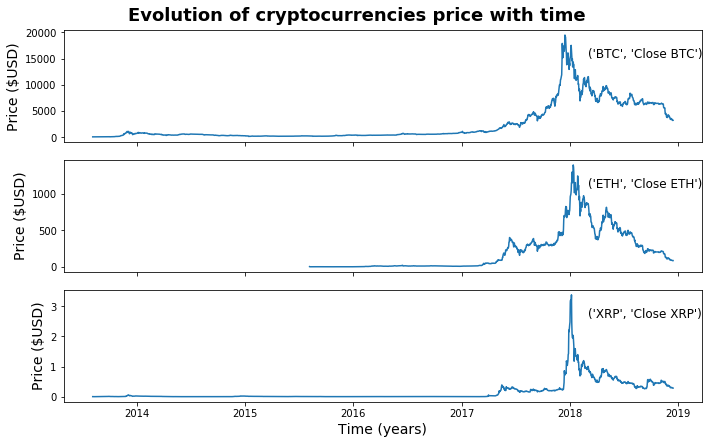

In [9]:
n_price = int(len(dataset.columns) / 3) # to determine the number of rows for the subplots (plot the price for each coin)

fig, axs = plt.subplots(nrows=n_price, ncols=1, sharex= True, figsize=(10,6)) # create a figure with n_price subplots in a row

for i in range(n_price): # loop for each subplot
    name = dataset.columns[i*3] # look at the price every 3 columns
    axs[i].plot(dataset[name]) # plot the price on the subplot
    axs[i].set_title(name, y=0.7, loc ='right')
    #axs[i].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    axs[i].locator_params(axis = 'y', nbins = 5) # modify the number ot ticks on the y axis
    axs[i].set_ylabel('Price ($USD)', fontsize = 14)
plt.xlabel('Time (years)', fontsize = 14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
fig.suptitle(r'Evolution of cryptocurrencies price with time', fontsize=18, fontweight='bold', y= 1.02)
fig.tight_layout()
plt.show();

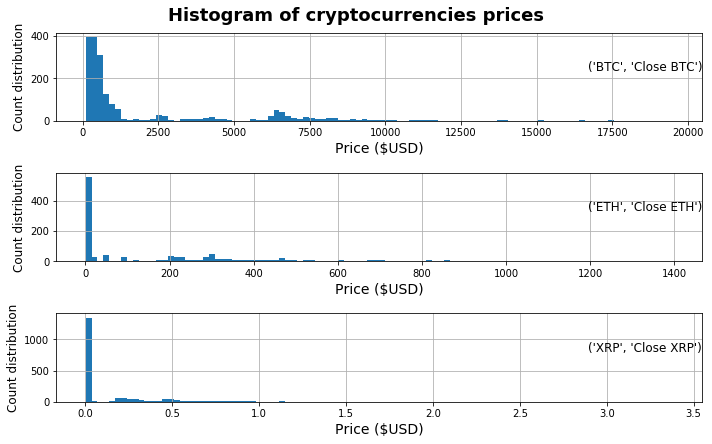

In [10]:
# histogram plots of price for each coin
fig = plt.figure(figsize =(10,6))
for i in range(n_price):
    plt.subplot(n_price, 1, i+1)
    name = dataset.columns[i*3]
    dataset[name].hist(bins=100) # plot the histogram on the designed subplot
    plt.title(name, y=0.5, loc='right')
    plt.xlabel('Price ($USD)', fontsize = 14)
    plt.ylabel('Count distribution', fontsize = 12)
fig.suptitle('Histogram of cryptocurrencies prices', fontweight='bold',fontsize=18, y = 1.02)
fig.tight_layout()
plt.show();

<p><div style="text-align: justify">From these graphs, we can see that all the different coins evolve in a similar way. Considering the big difference of price with time (before and after 2017), it would be better to plot these properties in a different way such as using a transformation (e.g log) or to normalize the data to get a better overview of the evolution with years. Usually, one interesting property when talking about investments or financial data, is of course the return on investment, which can be calculated in different ways, and can be more appealing for potential data analysis. However, here we just wanted to show that the data is ready to use, and the sub-sequent analysis is left for future work.</div></p>